In [3]:
import os
import pandas as pd

In [16]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydeni.csv"))

## Písně, které se točí v hodně letech, ale málo konkrétních týdnech

In [18]:
pd.Series(df.groupby(['track','interpret'])['rok'].nunique() / df.groupby(['track','interpret'])['tyden'].nunique()).sort_values(ascending=False).head(20)

track                                       interpret                    
Thank God It´s Christmas                    Queen                            2.50
Medvídek                                    Lucie                            2.25
All I Want For Christmas Is You             Mariah Carey                     2.20
Christmas Is All Around                     Billy Mack                       2.20
Christmas Without You                       Ava Max                          2.00
Happy Xmas (War Is Over)                    John Lennon                      2.00
Last Christmas                              Wham!                            2.00
Sliby se maj plnit o Vánocích               Janek Ledecký                    2.00
Na nebi svítí                               Dan Bárta                        1.75
Do They Know It´s Christmas?                Band Aid Ii.                     1.50
Zachraň co se dá                            Miloš Novotný                    1.00
Behind The Cow          

Lol Medvídek, je tam SNÍH, jsou to VÁNOCE.

## Písně, které mají Vánoce v názvu

In [20]:
df[df['track'].str.contains('Vánoc')]['track'].drop_duplicates()

30598    Sliby se maj plnit o Vánocích
35665                      Vánoce bílý
56090             Vánoce hrajou glóriá
61089                   Vánoce na míru
81392                 Vánoce jako dřív
86494    O Vánocích (feat. Boni Pueri)
86695                Vánoce přicházejí
Name: track, dtype: object

In [21]:
df[df['track'].str.contains('Xmas')]['track'].drop_duplicates()

35676    Happy Xmas (War Is Over)
Name: track, dtype: object

In [22]:
df[df['track'].str.contains('Christm')]['track'].drop_duplicates()

10298                     Last Christmas
25250                 Shake Up Christmas
25475                   Christmas Lights
30377            Christmas Is All Around
30580    All I Want For Christmas Is You
35693           Thank God It´s Christmas
40778                    White Christmas
45638       Do They Know It´s Christmas?
50996           Merry Christmas Everyone
76351              Christmas Without You
81461                    Merry Christmas
Name: track, dtype: object

In [23]:
vanocni = df[df['track'].str.contains('Christm')]['track'].drop_duplicates().to_list() + df[df['track'].str.contains('Xmas')]['track'].drop_duplicates().to_list() + df[df['track'].str.contains('Vánoc')]['track'].drop_duplicates().to_list()

## Kdy se to dostává do top 100

<Axes: xlabel='tyden'>

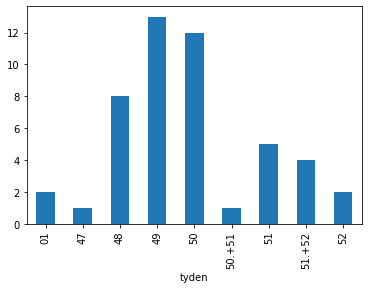

In [24]:
df[df['track'].isin(vanocni)].groupby("tyden")['rok'].nunique().plot.bar()

## Kdy nás ty tracky oblažily poprvé

In [25]:
df[df['track'].isin(vanocni)].groupby(['interpret','track'])['rok'].min().nsmallest(50)

interpret                       track                          
Wham!                           Last Christmas                     2008
Train                           Shake Up Christmas                 2010
Coldplay                        Christmas Lights                   2010
Billy Mack                      Christmas Is All Around            2011
Mariah Carey                    All I Want For Christmas Is You    2011
Janek Ledecký                   Sliby se maj plnit o Vánocích      2011
Queen                           Thank God It´s Christmas           2012
Lucie Vondráčková & Kolář Petr  Vánoce bílý                        2012
John Lennon                     Happy Xmas (War Is Over)           2012
Michael Bublé & Shania Twain    White Christmas                    2013
Band Aid Ii.                    Do They Know It´s Christmas?       2014
Shakin' Stevens                 Merry Christmas Everyone           2015
Petr Kotvald                    Vánoce hrajou glóriá               2016
